# Linear model between Novelty and Transcience

In [2]:
import numpy as np
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
import pandas as pd
import os

import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
filename = os.path.join("..","idmdl", "tweets_emo_date_W3.csv")

df = pd.read_csv(filename)

df["date"] = pd.to_datetime(df["date"])

df.head()

,date,emo_prob,novelty,transience,resonance,nsigma,tsigma,rsigma
0,2019-01-01,"[0.14579328851783585, 0.12960305757345764, 0.3...",0.000000,0.006014,0.000000,0.000000,0.000354,0.000000
1,2019-01-02,"[0.08907176251645407, 0.10464972084789613, 0.3...",0.000000,0.001875,0.000000,0.000000,0.001106,0.000000
2,2019-01-03,"[0.08783947459684412, 0.1068106467834229, 0.30...",0.000000,0.001088,0.000000,0.000000,0.000504,0.000000
3,2019-01-04,"[0.08889385312331158, 0.11508794314450768, 0.2...",0.002576,0.000583,0.001993,0.002188,0.000121,0.001154
4,2019-01-05,"[0.09640353072625699, 0.12730145251396646, 0.2...",0.001868,0.001376,0.000492,0.001108,0.000879,0.000994


In [4]:
def fit_linear(df, x_col='novelty', y_col='resonance'):
    X = df[x_col].tolist()
    X = np.array(X).reshape(-1, 1)
    X = StandardScaler().fit_transform(X)
    x = X.reshape(-1)

    y = df[y_col].tolist()
    y = np.array(y).reshape(-1, 1)
    y = StandardScaler().fit_transform(y)

    X = sm.add_constant(X)

    model = sm.OLS(y, X)
    est = model.fit()
    return est.params, x, y.reshape(-1), est.summary()

In [17]:
# remove christmas
subset19 = df[df["date"] < "2019-12-01"]
subset20 = df[df["date"] > "2020-01-02"]
subset20 = subset20[subset20['date'] < "2020-12-01"]
subset21 = df[df['date'] > "2021-01-02"]

df_no_ch = pd.concat([subset19, subset20, subset21])

# before and after COVID-19 (i.e. march 2020)
before_covid = df[df['date'] < "2020-03-11"]
after_covid = df[df['date'] >= "2020-03-11"]



In [7]:
before_covid = df[df['date'] < "2020-03-11"]
before_covid = before_covid[before_covid['date'] >= "2020-02-11"]
during_covid = df[df['date'] >= "2020-03-11"]
during_covid = during_covid[during_covid['date'] < "2020-04-11"]
after_covid = df[df['date'] >= "2020-04-11"]
after_covid = after_covid[after_covid['date'] < "2020-05-11"]

In [9]:
def plot_linear(ax, df, beta, title=None, xlab='Novlety'):

    ax.scatter(df['x'], df['y'], color='darkgrey', s=20, alpha=0.8, facecolors='None')
    sns.regplot(ax=ax, x='x', y='y', data=df, 
                scatter=False, ci=95, fit_reg=True,
                color = '#0072B2', label='95% CI')
    sns.regplot(ax=ax, x='x', y='y', data=df, 
                scatter=False, ci=0, fit_reg=True,
                color='black', label=r'$\beta_1$' + f'= {beta:.2f}')

    ax.set(xlabel=f'z({xlab})', ylabel = 'z(Resonance)')
    ax.tick_params(axis='both', labelsize=15)
    ax.yaxis.label.set_size(15)
    ax.xaxis.label.set_size(15)
    handles, labels = ax.get_legend_handles_labels()
    order = [1,0]
    ax.legend([handles[idx] for idx in order],[labels[idx] for idx in order],
              bbox_to_anchor=(0., -0.4, 1., 0.102), loc='lower center', 
              ncol=2, fontsize=15)
    if title:
        ax.set_title(title, fontdict={'size':20})
    return ax


/tmp/ipykernel_34733/1015456503.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  betas, df_['x'], df_['y'], summary = fit_linear(df_)
/tmp/ipykernel_34733/1015456503.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  betas, df_['x'], df_['y'], summary = fit_linear(df_)


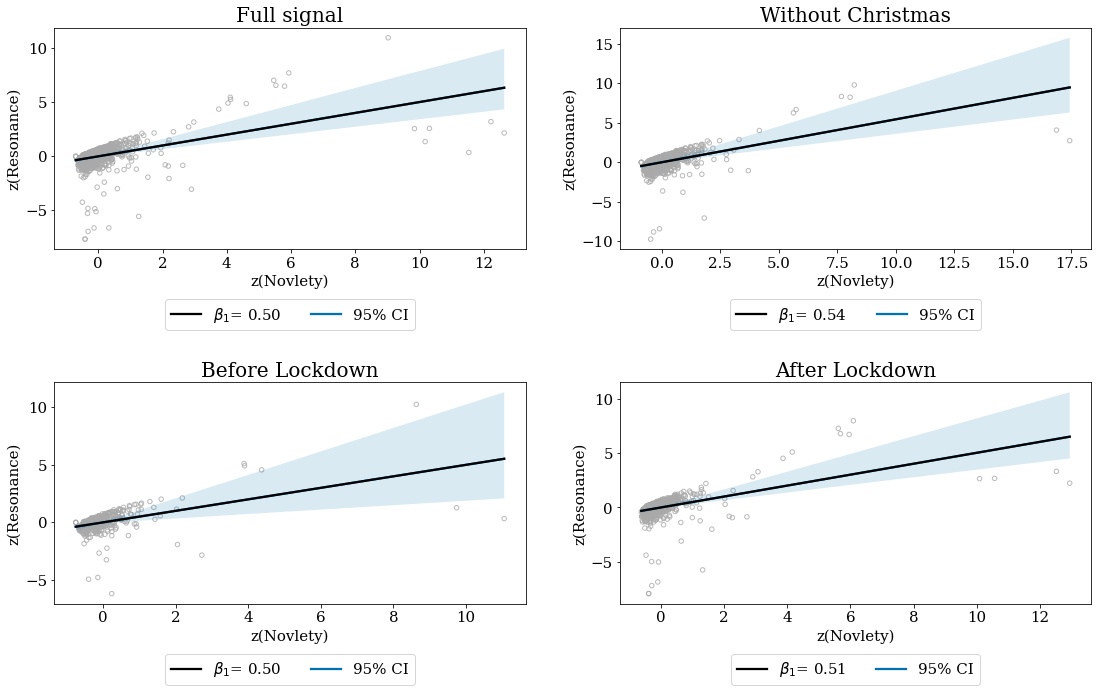

In [18]:
dfs = [df, df_no_ch, before_covid, after_covid]
# dfs = [df, before_covid, during_covid, after_covid]
summaries = []

plt.rcParams["font.family"] = 'DeJavu Serif'
title = ['Full signal', 'Without Christmas', 'Before Lockdown', 'After Lockdown']
# title = ['Full signal', 'Before Lockdown', 'During Lockdown', 'After Lockdown']
fig, axes = plt.subplots(2,2, figsize=(18,10))
i, j = 0, 0
for df_, t in zip(dfs, title):
    ax = axes[i,j]
    betas, df_['x'], df_['y'], summary = fit_linear(df_)
    summaries.append(summary)
    ax = plot_linear(ax, df_, betas[1], title=t)
    if j == 1:
        i +=1
        j = 0
    else:
        j +=1
    
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.6)
plt.savefig("../fig/lin_models.png")
plt.show()

In [54]:
for sum, t in zip(summaries, title):
    print(t, sum, sep='\n', end='\n \n')

Full signal
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.284
Model:                            OLS   Adj. R-squared:                  0.284
Method:                 Least Squares   F-statistic:                     337.6
Date:                Mon, 20 Dec 2021   Prob (F-statistic):           9.86e-64
Time:                        14:29:20   Log-Likelihood:                -1065.1
No. Observations:                 851   AIC:                             2134.
Df Residuals:                     849   BIC:                             2144.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8.711e-18      0.029      3e

# Linear model with each emotion predicting resonance signals

In [55]:
import pandas as pd
import re

In [56]:
def get_emotion_distribution(emo: str, n: int=8):
    '''
    For transforming the BERT emotion distribution from a str to a list of floats
    If there is no emotion distribution, it returns NaN
    '''
    if not isinstance(emo, str): # if emo == NaN
        return emo
    emo_list = re.split(r',\s+', emo[1:-1])[:n]
    emo_list = list(map(lambda x: float(x), emo_list))
    return emo_list

In [57]:
df.head()

,date,emo_prob,novelty,transience,resonance,nsigma,tsigma,rsigma,x,y
0,2019-01-01,"[0.13655387965800936, 0.13095321826100983, 0.3...",0.000000,0.007187,0.000000,0.000000,0.001711,0.000000,-0.886838,-0.004187
1,2019-01-02,"[0.08091568521634232, 0.09035963937652772, 0.3...",0.000000,0.003413,0.000000,0.000000,0.001666,0.000000,-0.886838,-0.004187
2,2019-01-03,"[0.08403529679919247, 0.0910697144345674, 0.30...",0.000000,0.001530,0.000000,0.000000,0.000498,0.000000,-0.886838,-0.004187
3,2019-01-04,"[0.0866288507944467, 0.10716675546084177, 0.30...",0.003033,0.000656,0.002376,0.001695,0.000125,0.000910,1.221863,1.822140
4,2019-01-05,"[0.08950032989547523, 0.11767038233149285, 0.2...",0.002756,0.001509,0.001246,0.002022,0.001012,0.001517,1.029269,0.953708


In [58]:
labels = [
        "Glæde/Sindsro",
        "Tillid/Accept",
        "Forventning/Interrese",
        "Overasket/Målløs",
        "Vrede/Irritation",
        "Foragt/Modvilje",
        "Sorg/trist",
        "Frygt/Bekymret",
    ]

In [59]:
emo_lists = list(map(get_emotion_distribution,list(df["emo_prob"])))

In [60]:
for i, label in enumerate(labels):
    df[label] = [distribution[i] for distribution in emo_lists]

In [61]:
df.head()

,date,emo_prob,novelty,transience,resonance,nsigma,tsigma,rsigma,x,y,Glæde/Sindsro,Tillid/Accept,Forventning/Interrese,Overasket/Målløs,Vrede/Irritation,Foragt/Modvilje,Sorg/trist,Frygt/Bekymret
0,2019-01-01,"[0.13655387965800936, 0.13095321826100983, 0.3...",0.000000,0.007187,0.000000,0.000000,0.001711,0.000000,-0.886838,-0.004187,0.136554,0.130953,0.305092,0.106356,0.053838,0.196597,0.030209,0.040170
1,2019-01-02,"[0.08091568521634232, 0.09035963937652772, 0.3...",0.000000,0.003413,0.000000,0.000000,0.001666,0.000000,-0.886838,-0.004187,0.080916,0.090360,0.323928,0.112786,0.057775,0.216573,0.042207,0.075242
2,2019-01-03,"[0.08403529679919247, 0.0910697144345674, 0.30...",0.000000,0.001530,0.000000,0.000000,0.000498,0.000000,-0.886838,-0.004187,0.084035,0.091070,0.306952,0.122620,0.056574,0.243417,0.040274,0.054824
3,2019-01-04,"[0.0866288507944467, 0.10716675546084177, 0.30...",0.003033,0.000656,0.002376,0.001695,0.000125,0.000910,1.221863,1.822140,0.086629,0.107167,0.306949,0.117312,0.060982,0.242701,0.034531,0.043500
4,2019-01-05,"[0.08950032989547523, 0.11767038233149285, 0.2...",0.002756,0.001509,0.001246,0.002022,0.001012,0.001517,1.029269,0.953708,0.089500,0.117670,0.274830,0.124120,0.061285,0.256506,0.032693,0.043201


In [62]:
subset = df[df["date"] > "2020-12-01"]
subset = subset[subset["date"] < "2021-01-03"]

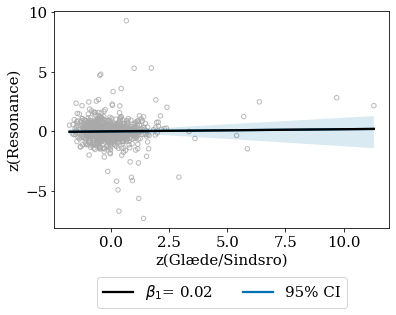

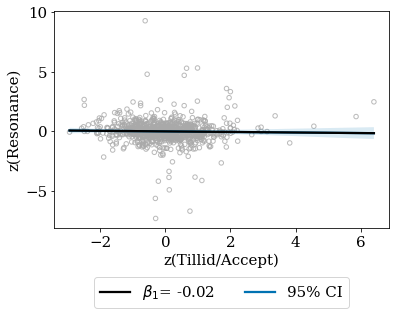

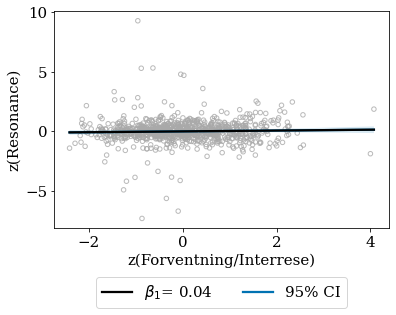

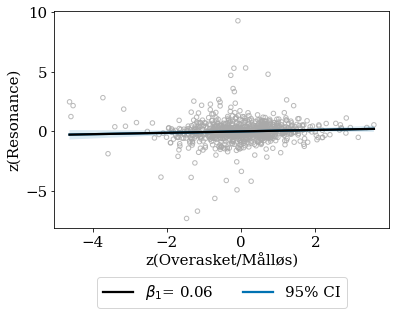

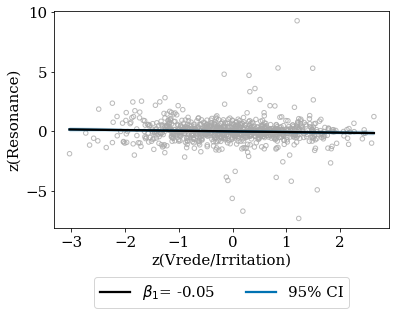

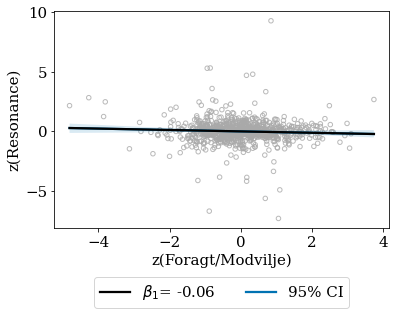

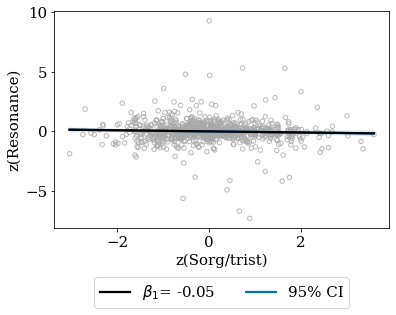

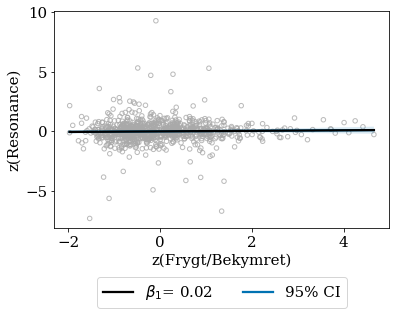

In [63]:
for label in labels:
    fig, ax = plt.subplots()
    df_ = df
    betas, df_['x'], df_['y'], summary = fit_linear(df_, x_col=label)
    summaries.append(summary)
    ax = plot_linear(ax, df_, betas[1], xlab=label)
    plt.show()